<a href="https://colab.research.google.com/github/TITHI007/NLP/blob/main/NLP_Practical_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement word embedding using GloVe**

unsupervised learning algorithm for obtaining vector representations for words
performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting represents linear substructures.

P(j|i)=P(j is in the context of i)=Xij/Xi
(Xi is summation of Xik(in context to other works)

In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [10]:
glove_model["beautifull"]
# As these wordis not there in the corpus,we will get the following errors

KeyError: ignored

In [4]:
glove_model.most_similar("girl")

[('boy', 0.8272891044616699),
 ('woman', 0.729641854763031),
 ('girls', 0.7227291464805603),
 ('teenager', 0.650977373123169),
 ('teenage', 0.6492719650268555),
 ('mother', 0.6417974829673767),
 ('boys', 0.6283578872680664),
 ('child', 0.6229295134544373),
 ('teen', 0.612524151802063),
 ('daughter', 0.6050207614898682)]

In [5]:
glove_model.most_similar("boy")

[('girl', 0.8272891044616699),
 ('boys', 0.681233286857605),
 ('kid', 0.655293345451355),
 ('man', 0.6208277940750122),
 ('teenage', 0.5973849892616272),
 ('child', 0.5952882766723633),
 ('teenager', 0.5896497964859009),
 ('father', 0.5800690650939941),
 ('girls', 0.574547290802002),
 ('son', 0.5726955533027649)]

In [6]:
glove_model.most_similar("teenage")

[('teen', 0.7605429887771606),
 ('teenagers', 0.6824879050254822),
 ('teenager', 0.6626788377761841),
 ('teenaged', 0.651595413684845),
 ('girl', 0.6492719650268555),
 ('teens', 0.6297783255577087),
 ('boy', 0.597385048866272),
 ('young', 0.5967362523078918),
 ('girls', 0.5905085206031799),
 ('agers', 0.5701534152030945)]

In [7]:
glove_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.6770139336585999)]

In [8]:
glove_model.most_similar(positive=['girl', 'king'], negative=['boy'], topn=1)

[('queen', 0.6850624680519104)]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


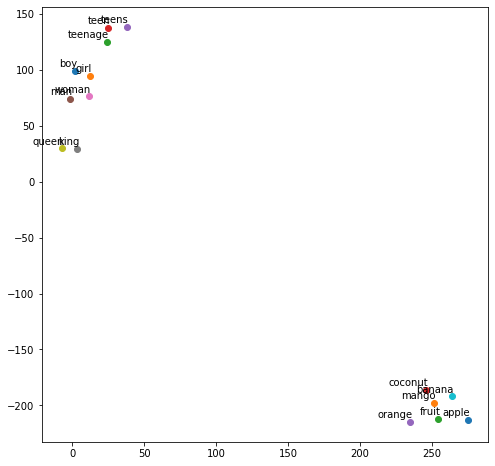

In [9]:
vocab = ["boy", "girl","teenage","teen","teens", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3 ,n_components=2, init='pca', random_state=42)
#     Lower the perplexity,closer the points will be in the graph
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove_model)

Difference between Word2Vec and GLoVe are:
Word2Vec are based on CBOW and skipgram whereas GLoVe is based on co-occurence matrix.
Word2Vec are local whereas GLoVe is Global.
